#Dynamical chaos

This notebook aims to provide some examples of dynamical systems demonstrating chaotical behaviour. We'll start from simple reccurent equations and go forward to space-time distributed systems.

Most examples are taken from the book "Dynamical chaos" by S.Kuznetsov available in Russian.

## Definitions
* *Dynamical system* – object of various nature if it can be described by some *dynamical variables* determining *system state* and evolution of the system can be described by some *arbitrary rule*
* *Dissipative system* – kind of a system where dynamics after transient process becomes independent on initial conditions
* *Attractor* – set of dynamical states in a dissipative system after the transient process is completed

In [34]:
%pylab
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

#import matplotlib
#matplotlib.style.use('ggplot')

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [251]:
def iterator(f, x0=0, inf=1000):
    """
        iterator function returns iterator for given function f.
        
        Parameters:
        f            iterating function of one argument
        x0           initial condition
        inf          maximum next absolute value of a variable when iteration stops
    """
    x = x0  # x - iteration value, i - counter
    while abs(x) < inf:    
        yield x
        x = f(x)

assert [x for x in iterator(lambda x: x+2, x0=2, inf=15)] == [2, 4, 6, 8, 10, 12, 14]

In [252]:
def take(it, n=100, skip=10):
    """
        take takes n points from iterator it skipping first skip points.
        
        Parameters:
        it           iterator
        n            number of results to return
        skip         number of steps to skip
    """
    i = 0
    while i < skip:
        try:
            it.next()
            i += 1
        except StopIteration:
            return []
    
    i = 0
    result = []
    while i < n:
        try:
            result.append(it.next())
            i += 1
        except StopIteration:
            return result
    return result

assert take(iterator(lambda x: x+2, x0=1, inf=10000), n=5, skip=5) == [11, 13, 15, 17, 19]

In [320]:
def diagram_points(xs):
    """
        diagram_points takes list of numbers and returns a list
        of tuples where each tuple corresponds to a point
        on iterative diagram.
    """
    #result = [(xs[0], 0)]
    result = []
    for x, y in zip(xs, xs[1:]):
        result.append((x,x))
        result.append((x,y))
    return result
    
#assert diagram_points([1,2,3]) == [(1,0), (1,1), (1,2), (2,2), (2,3)]
assert diagram_points([1,2,3]) == [(1,1), (1,2), (2,2), (2,3)]

In [209]:
def linspace(start=1.0, stop=10.0, step=1.0):
    """
        linspace returns list of linear space steps from start to stop
        devided by step
    """
    return [start+i*step for i in range(int((stop-start)/step)+1)]

assert linspace(1,3,0.5) == [1, 1.5, 2, 2.5, 3]
assert linspace() == [1,2,3,4,5,6,7,8,9,10]

In [210]:
# boundary is a function which returns boundary curve for given function
boundary = lambda f, limits: pd.DataFrame([(x, f(x)) for x in linspace(limits[0], limits[1], 0.001)])

In [363]:
# let's draw cobweb plot diagram x_{n+1} over x_n of sawtooth map
# along with evolution of x_n over n

def cobweb_plot(xs, limits=[0,1], title='Plot', *dfs):
    fig, axes = plt.subplots(1, 2, figsize=(15, 6));
    plt.subplots_adjust(wspace=0.5, hspace=0.5);

    pd.DataFrame(zip(limits,limits)).plot(x=0, y=1, ax=axes[0], xlim=limits, ylim=limits, legend=False, color='k')
    for df in dfs:
        df.plot(x=0, y=1, ax=axes[0], legend=False, color='k')

    pd.DataFrame(diagram_points(xs), columns=('n', 'n1')).plot(x='n', y='n1', style='o-', ax=axes[0], legend=False)
    pd.DataFrame(xs).plot(style='o-', ax=axes[1], legend=False)

    axes[0].set_xlabel('x_n')
    axes[0].set_ylabel('x_n+1')
    axes[1].set_xlabel('n')
    axes[1].set_ylabel('x_n')

## Sawtooth map

Let's examine simple system where each next element is derived by previous element by the following rule:

$$x_{n+1}=\{2 x_n\}$$

where operator $\{\}$ means taking decimal part of a number.

In [35]:
#from math import trunc
assert trunc(1.5) == 1.0
assert trunc(12.59) == 12.0
assert trunc(1) == 1.0

In [315]:
sawtooth = lambda x: round(2*x-trunc(2*x),8)

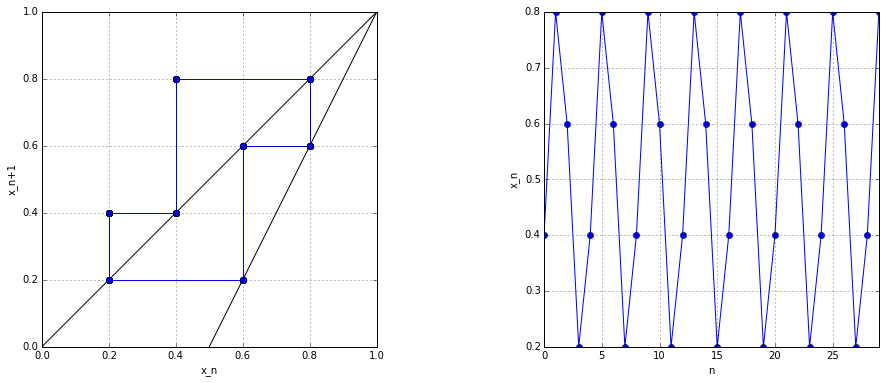

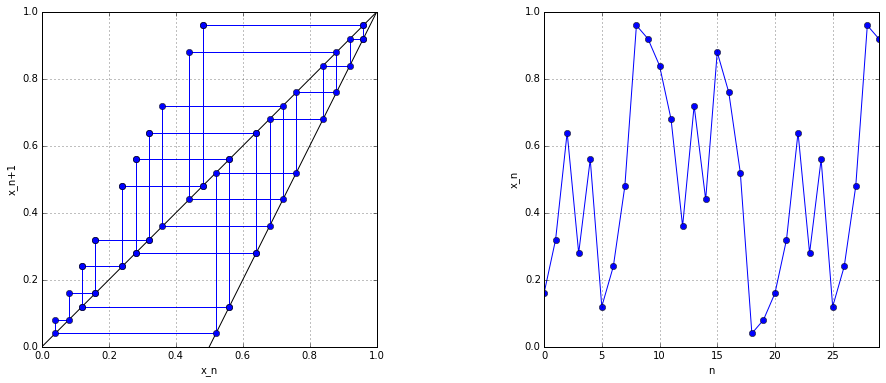

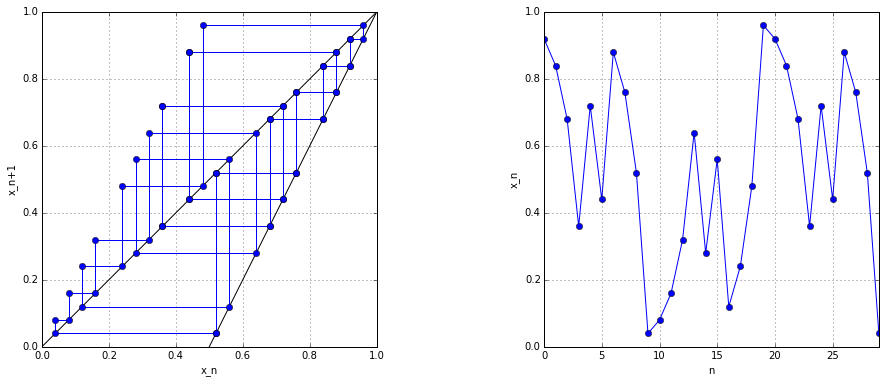

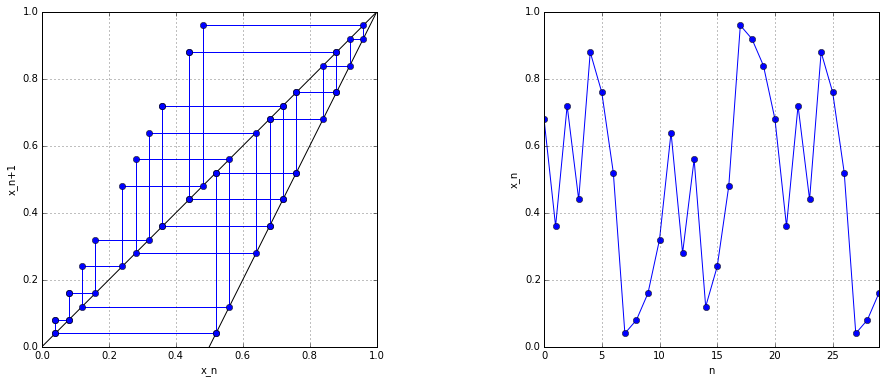

In [364]:
sawtooth_borders = [pd.DataFrame([(0,0),(0.5,1)]), pd.DataFrame([(0.5,0),(1,1)])]
for x0 in [0.4, 0.41, 0.42, 0.43]:
    cobweb_plot(take(iterator(sawtooth, x0=x0), n=30, skip=500), [0,1], *sawtooth_borders)

## Logistic map
Here we have very simple equation:
$$x_{n+1} = k x_n (1 - x_n)$$
where $k$ is some fixed constant.

In [353]:
logistic = lambda k, x: k*x*(1-x)

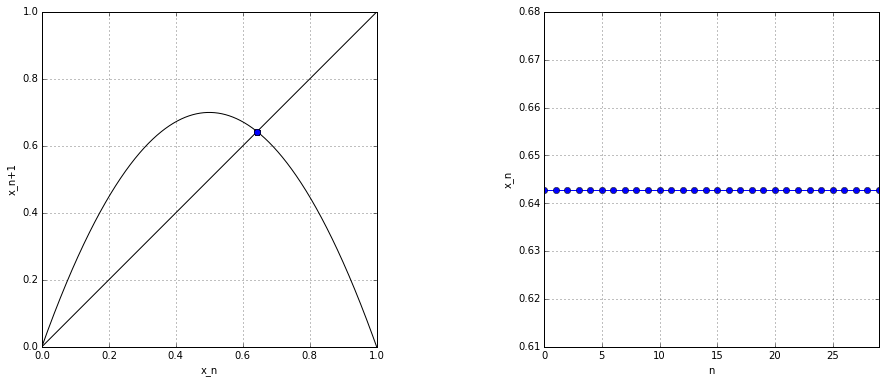

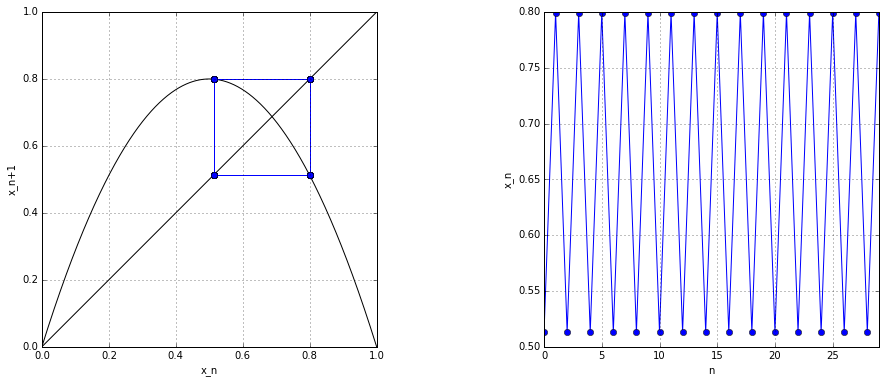

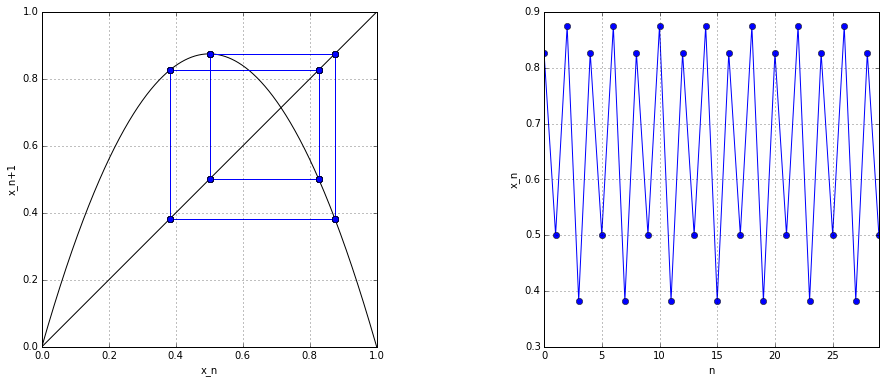

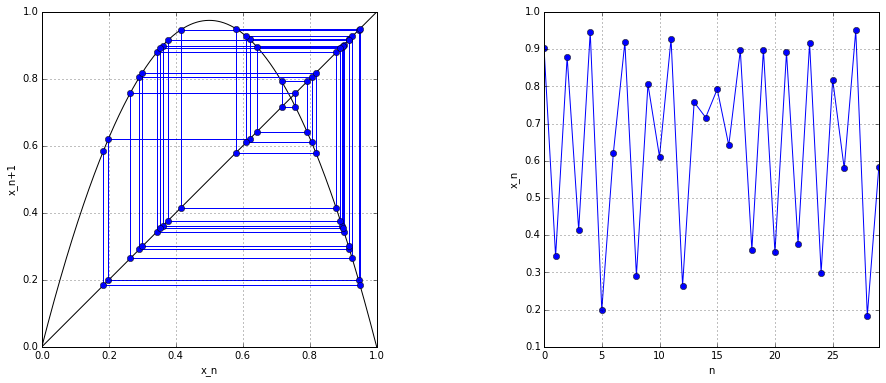

In [365]:
limits = [0,1]
for k in [2.8, 3.2, 3.5, 3.9]:
    l = lambda x: logistic(k, x)
    cobweb_plot(take(iterator(l, x0=0.1), n=30, skip=500), limits, 'plot', boundary(l, limits))

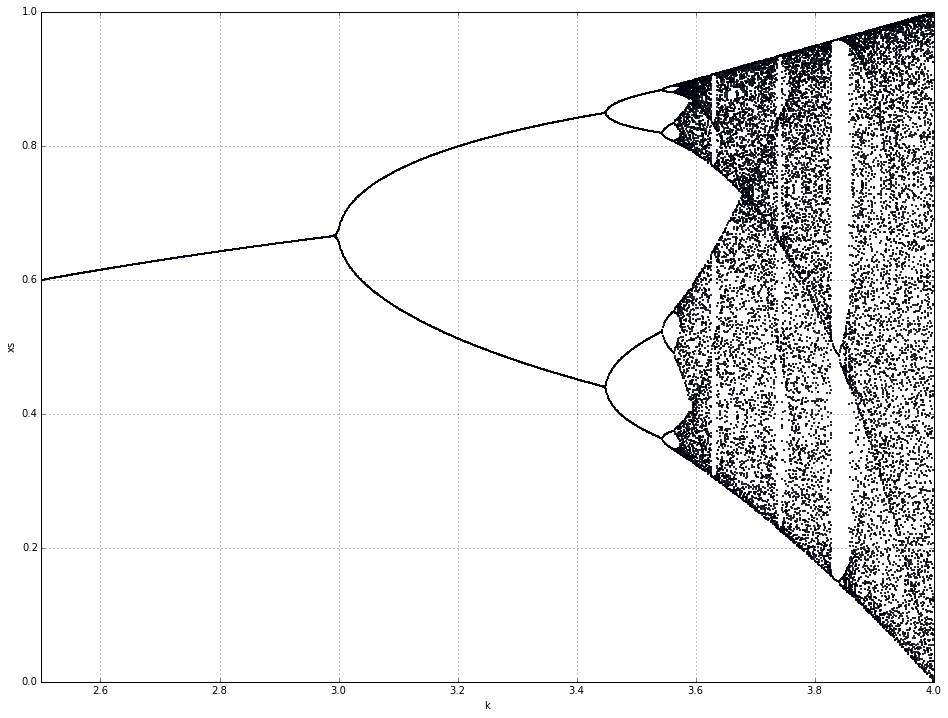

In [352]:
# let's plot the bifurcation diagram

dots = []
for k in linspace(2.5, 4, 0.001):
    for dot in set(take(iterator(lambda x: logistic(k, x), x0=0.5), n=50, skip=500)):
        dots.append((k, dot))

df = pd.DataFrame(dots, columns=('k', 'xs'))
df.plot(x='k', y='xs', kind='scatter', style='.', figsize=(16,12), s=1, xlim=[2.5,4], ylim=[0,1])